Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Reading the serial port of an Arduino device  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [7]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import sys
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. Setup serial communication


In [8]:
port  = '/dev/ttyUSB0'
baud  =  9600
Ardn  =  serial.Serial(port, baud, timeout=1)


### 2. Define function for reading one single received line

In [9]:
def readcell():

    err = True
    Ardn.write(b'0')

    while(err):
        try:
            if (Ardn.inWaiting() >= 27):
                bdat = Ardn.readline() 
                sdat = bdat.decode()
                err  = False
        except:
            err = True

    sdat = sdat.replace('\n',' ').split()
    return  np.array(sdat[0:3], dtype='uint32')


### 3. Acquire data lines from serial port

In [10]:
n     =  128
D     =  np.empty((3,n), dtype='uint32')

try:
    for i in  range(n):
        D[0,i], D[1,i], D[2,i] = readcell()

    Ardn.close()
    print('Acquisition ok!')

except:
    Ardn.close()
    sys.exit('Acquisition failure!')

Acquisition ok!


### 4. Save the data into an Excel file 

In [11]:
data      =  pd.DataFrame(data = D.T)
filename  = 'ReadSerial.xlsx'
excelfile =  pd.ExcelWriter(filename)

data.to_excel(excelfile,filename)
excelfile.save()


### 5. Data visualization

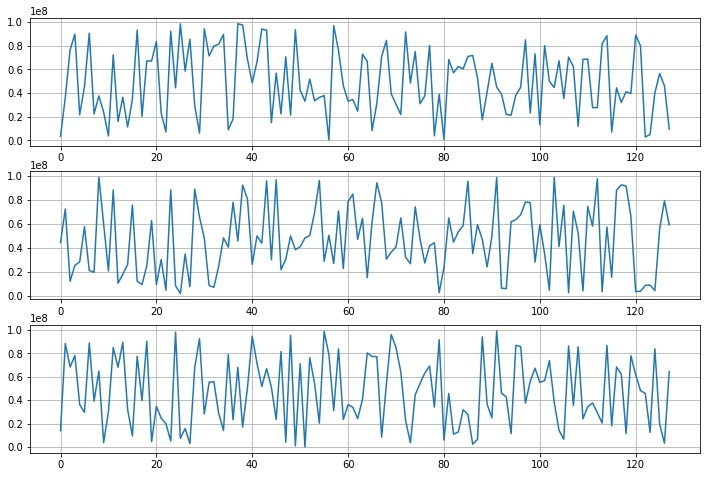

In [13]:
fig01  = plt.figure(1, figsize=(12,8))

fig01a = plt.subplot(3,1,1)
plt.plot(D[0,:])
plt.grid(True)
                    
fig01a = plt.subplot(3,1,2)
plt.plot(D[1,:])
plt.grid(True)

fig01a = plt.subplot(3,1,3)
plt.plot(D[2,:])
plt.grid(True)
